In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(259, 194)


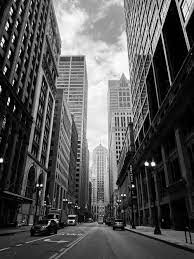

In [6]:
# read image
image = cv2.imread('11.jpg')

image  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# In windows:
# window_name = 'image'
# cv2.imshow(window_name, image)


## Canny Edge Detector step by step

Step 1: Noise reduction

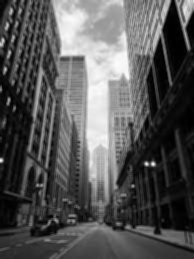

In [7]:
average_blur = cv2.blur(image, (3,3))
cv2_imshow(average_blur)

Step 2: Gradient Calculation  

1- write your convolution function in python scratch

2- apply sobel X

3- apply sobel y

4- calculte edge direction and gradient intensity





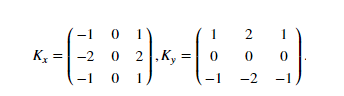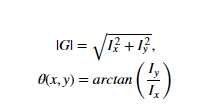

## Convolution from scratch
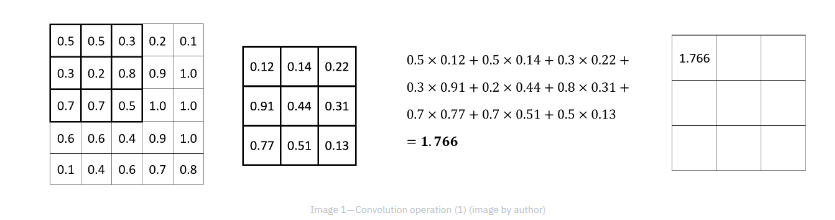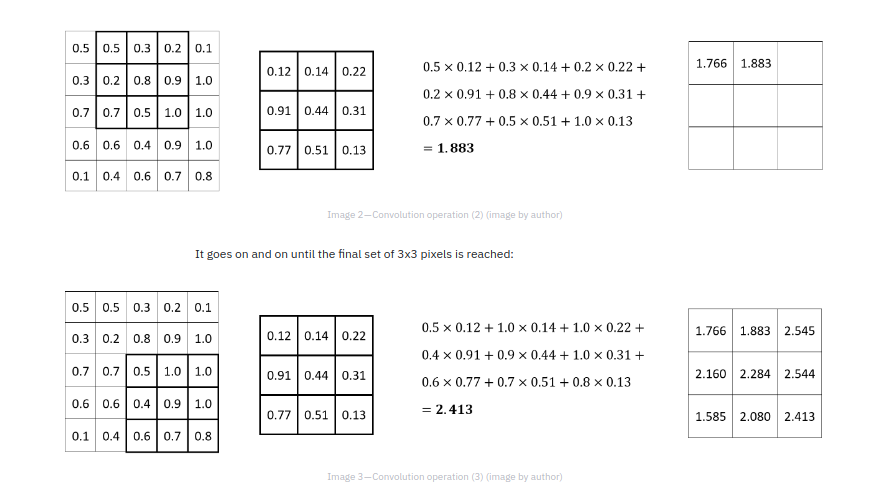

In [ ]:
sub_image = np.array([[1,2],[3,4]])
kernel = np.ones((2,2))
print(sub_image, '\n',kernel)
mul = np.multiply(sub_image,kernel)
conv = np.sum(mul)
print(conv)

[[1 2]
 [3 4]] 
 [[1. 1.]
 [1. 1.]]
10.0


In [ ]:
scale = 1
delta = 0
grad_x = cv2.Sobel(average_blur, cv2.CV_16S, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(average_blur, cv2.CV_16S, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
cv2_imshow(abs_grad_x)
cv2_imshow(abs_grad_y)

theta = np.arctan2(abs_grad_x, abs_grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2_imshow(grad)

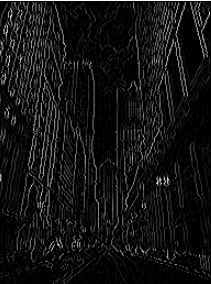

Step 3: Non-Maximum Suppression

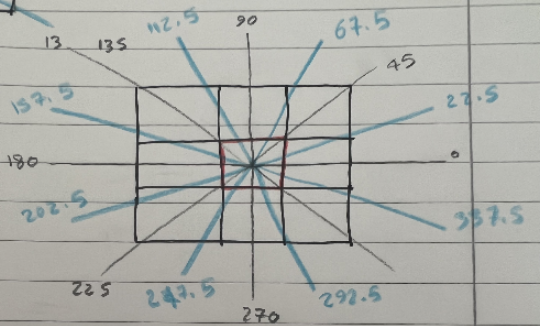

Step 4: Double Threshold

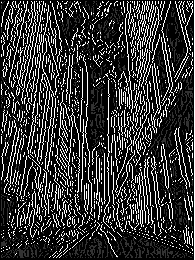

Canny Edge Detector in with open cv:

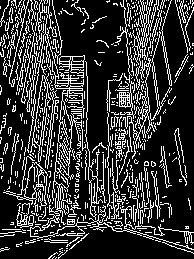

In [ ]:
t_lower = 125  # Lower Threshold
t_upper = 175  # Upper threshold
canny_og = cv2.Canny(image, t_lower, t_upper)
cv2_imshow(canny_og)

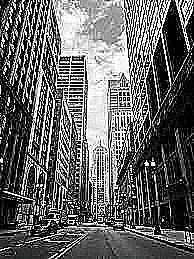

In [ ]:
# Sharpening of an image
# Creating a sharpening kernel
kernel_sharp = np.array([[-1,-1,-1],
[-1,9,-1],
[-1,-1,-1]])
# Putting a negative value for depth to
sharpened = cv2.filter2D(image,-1,kernel_sharp)
cv2_imshow(sharpened)

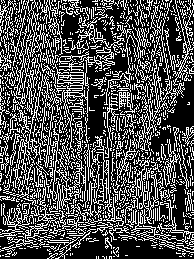

In [ ]:
t_lower = 125  # Lower Threshold
t_upper = 175  # Upper threshold
canny_sharpened = cv2.Canny(sharpened, t_lower, t_upper)
cv2_imshow(canny_sharpened)